# Brent Prices Forecast

Divyanshu Vyas | Oil and Gas Data Science

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('BrentOilPrices.csv',index_col=0,parse_dates=True)

In [3]:
df.head()

,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63


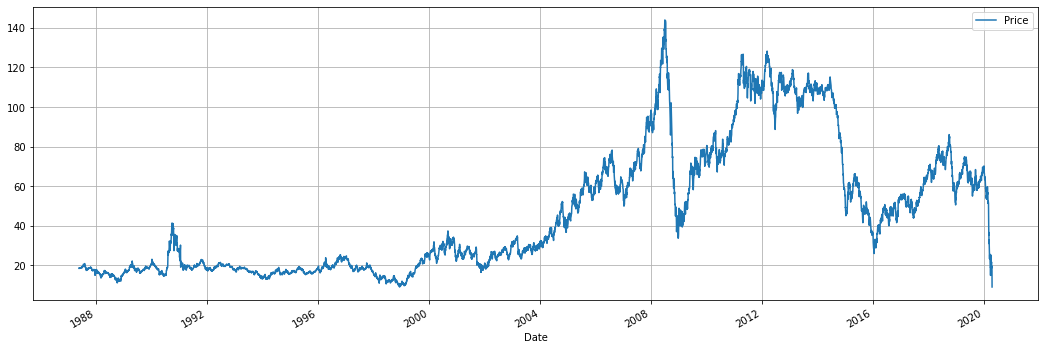

In [4]:
df.plot(figsize=(18,6))
plt.grid()

In [5]:
df['d1'] = df['Price'] - df['Price'].shift(1)

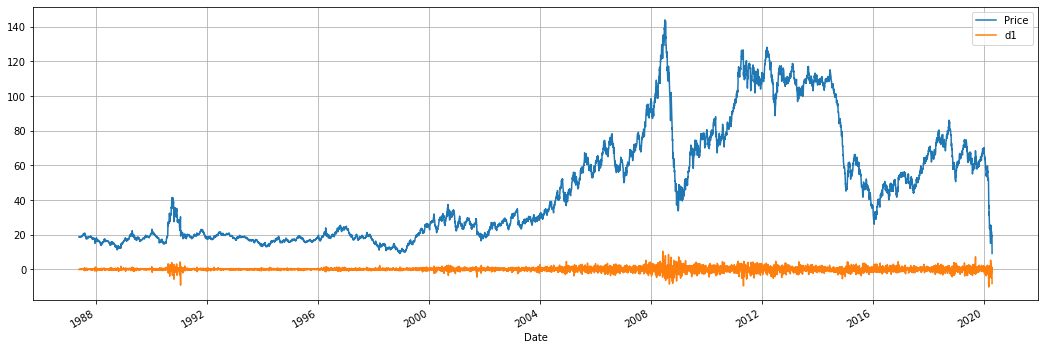

In [6]:
df.plot(figsize=(18,6))
plt.grid()

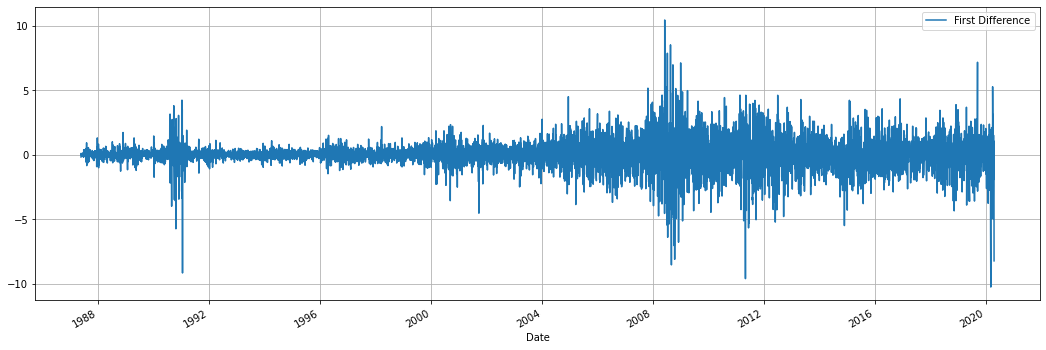

In [7]:
df['d1'].plot(figsize=(18,6),legend=True,label='First Difference')
plt.grid()

In [8]:
df['Rolling Mean'] = df['Price'].rolling(window=30).mean()

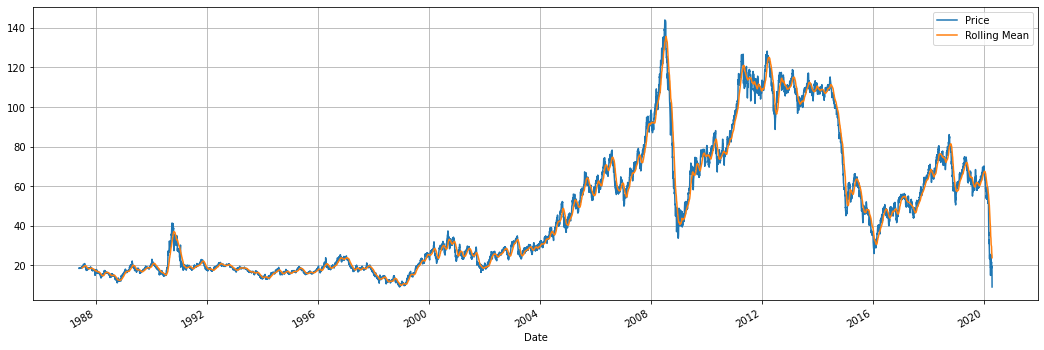

In [9]:
df[['Price','Rolling Mean']].plot(figsize=(18,6))
plt.grid()

# ETS Decomposition

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [11]:
df.index

DatetimeIndex(['1987-05-20', '1987-05-21', '1987-05-22', '1987-05-25',
               '1987-05-26', '1987-05-27', '1987-05-28', '1987-05-29',
               '1987-06-01', '1987-06-02',
               ...
               '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09',
               '2020-04-14', '2020-04-15', '2020-04-16', '2020-04-17',
               '2020-04-20', '2020-04-21'],
              dtype='datetime64[ns]', name='Date', length=8360, freq=None)

In [12]:
result = seasonal_decompose(df['Price'],model='multiplicative',period=1)

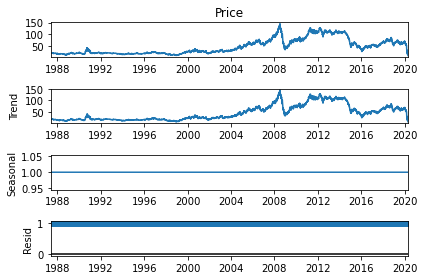

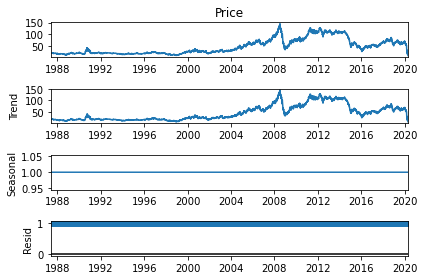

In [13]:
result.plot()

In [14]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [15]:
cycle,trend = hpfilter(df['Price'],lamb=1600)

In [16]:
df['trend'] = trend

In [17]:
df.head()

,Price,d1,Rolling Mean,trend
Date,,,,
1987-05-20,18.63,NaN,NaN,18.511323
1987-05-21,18.45,-0.18,NaN,18.526670
1987-05-22,18.55,0.10,NaN,18.542092
1987-05-25,18.60,0.05,NaN,18.557614
1987-05-26,18.63,0.03,NaN,18.573267


In [18]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [19]:
len(df)

8360

In [20]:
0.70*8360

5852.0

In [28]:
train = df.iloc[:5800]

test = df.iloc[5800:]

In [29]:
fitted_model = ExponentialSmoothing(train['Price'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:390: RuntimeWarning: invalid value encountered in less
  if np.any((x0 < lb) | (x0 > ub)):
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:390: RuntimeWarning: invalid value encountered in greater
  if np.any((x0 < lb) | (x0 > ub)):
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_numdiff.py

In [30]:
test_predictions = fitted_model.forecast(36).rename('HW Forecast')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


KeyError: 'Price'

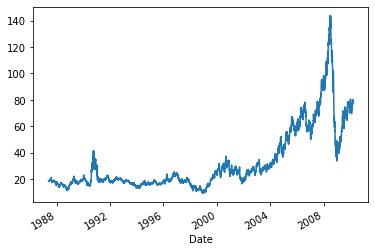

In [33]:
train['Price'].plot()
test_predictions['Price'].plot()

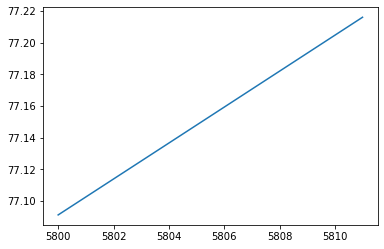

In [27]:
pred.plot()

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [36]:
x = np.empty(1000)
y = np.empty(1000)

x[:500] = 1 ; x[520:700] = 10; x[740:] = 100
y[:200] = 20 ; y[220:500] = 100; y[600:] = 1000

# x[200:250] = np.nan
# x[380:470] = np.nan

# y[480:780] = np.nan

z = np.ones(1000)*1000

# z[860:960] = np.nan
y = np.ones(1000)*1000

In [37]:
df = pd.DataFrame({'X1':x,'X2':y,'Y':z})

Text(0.5, 1.0, 'Whites represent NaNs')

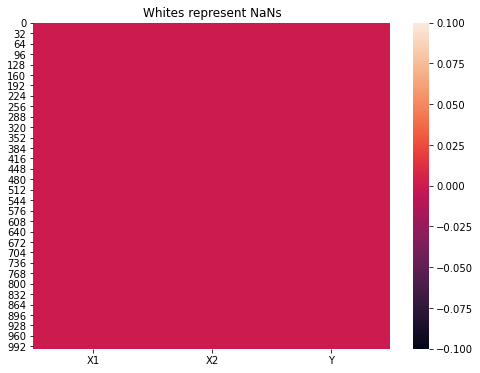

In [38]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8,6))
sns.heatmap(df.isnull())
plt.title('Whites represent NaNs')

In [40]:
g = ['Male','Female','Male','Female','Male','Female','Male','Male']

data = pd.DataFrame({'Gender' : g})

In [41]:
data

,Gender
0,Male
1,Female
2,Male
3,Female
4,Male
5,Female
6,Male
7,Male


In [42]:
pd.get_dummies(data['Gender'])

,Female,Male
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1
5,1,0
6,0,1
7,0,1
